In [12]:
# Importing packages

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
# Function to open the csv files and merge them by the columns 'Entity' and 'Year'

def merge_csv(folder_path):
    all_dataframes = []

    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            file_path = os.path.join(folder_path, file_name)
            df = pd.read_csv(file_path)
            all_dataframes.append(df)

    merged_df = pd.concat(all_dataframes, ignore_index=True)
    merged_df = merged_df.groupby(['Entity', 'Year']).sum().reset_index()

    return merged_df

In [4]:
df = merge_csv('/data/')

# saving the csv

df.to_csv('merged_total_dataset.csv', index=False)

/var/folders/tn/_cldsrsx169d6c6_fzk5x91h0000gn/T/ipykernel_19763/1770646144.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged_df = merged_df.groupby(['Entity', 'Year']).sum().reset_index()


In [5]:
# Finding the label for USA

print(np.unique(df['Entity']))

['Afghanistan' 'Africa' 'Africa (BP)' 'Africa (Ember)' 'Albania' 'Algeria'
 'American Samoa' 'Angola' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Aruba' 'Asia' 'Asia (Ember)' 'Asia Pacific' 'Asia Pacific (BP)'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'CIS' 'CIS (BP)' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Cayman Islands' 'Central African Republic' 'Central America (BP)' 'Chad'
 'Chile' 'China' 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Eastern Africa (BP)' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Europe' 'Europe (BP)' 'Europe (Ember)' 'European Union 

In [6]:
# Filtering the data for USA only
usa = df[df['Entity'] == 'United States']
print(usa)

             Entity  Year  Geo Biomass Other - TWh  Solar Generation - TWh  \
8461  United States  1965                53.328928                0.000000   
8462  United States  1966                56.248028                0.000000   
8463  United States  1967                56.294284                0.000000   
8464  United States  1968                62.184180                0.000000   
8465  United States  1969                64.908240                0.000000   
8466  United States  1970                64.943612                0.000000   
8467  United States  1971                66.337656                0.000000   
8468  United States  1972                74.691920                0.000000   
8469  United States  1973                79.958772                0.000000   
8470  United States  1974                81.617056                0.000000   
8471  United States  1975                79.017204                0.000000   
8472  United States  1976                90.259016              

In [7]:
# saving the final csv

usa.to_csv('merged_usa_dataset.csv', index=False)

In [9]:
# analysing the dataframe

usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 8461 to 8517
Data columns (total 22 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Entity                                      57 non-null     object 
 1   Year                                        57 non-null     int64  
 2   Geo Biomass Other - TWh                     57 non-null     float64
 3   Solar Generation - TWh                      57 non-null     float64
 4   Wind Generation - TWh                       57 non-null     float64
 5   Hydro Generation - TWh                      57 non-null     float64
 6   Electricity from solar (TWh)                57 non-null     float64
 7   Solar Capacity                              57 non-null     float64
 8   Geothermal Capacity                         57 non-null     float64
 9   Solar (% electricity)                       57 non-null     float64
 10  Wind (% ele

In [18]:
usa.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,57.0,1993.000000,16.598193,1965.000000,1979.000000,1993.000000,2007.000000,2021.000000
Geo Biomass Other - TWh,57.0,206.561258,99.325137,53.328928,103.024148,259.261656,292.639440,336.280920
Solar Generation - TWh,57.0,52.574192,138.811004,0.000000,0.000000,1.913012,4.381642,661.426280
Wind Generation - TWh,57.0,209.388279,395.125448,0.000000,0.000000,12.144755,139.191620,1534.413080
Hydro Generation - TWh,57.0,1099.926392,133.912440,795.896360,1024.114120,1096.120120,1159.289800,1423.892400
Electricity from solar (TWh),57.0,101.497905,275.768853,0.000000,0.000000,3.826023,4.880000,1315.360000
Solar Capacity,57.0,29.660282,77.154381,0.000000,0.000000,0.000000,3.896000,374.852064
Geothermal Capacity,57.0,3983.597193,4927.221164,0.000000,0.000000,0.000000,9528.000000,12683.840000
Solar (% electricity),57.0,1.235233,3.344986,0.000000,0.000000,0.051550,0.059108,15.839237
Wind (% electricity),57.0,5.070421,9.501252,0.000000,0.000000,0.356690,3.326438,36.433520


In [17]:
# checking for null values

missing = pd.concat([usa.isnull().sum(), 100 * usa.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
Entity,0,0.0
Year,0,0.0
Hydro (% electricity),0,0.0
Wind Capacity,0,0.0
Other renewables including bioenergy (TWh),0,0.0
Electricity from wind (TWh),0,0.0
Biofuels Production - TWh - Total,0,0.0
Electricity from hydro (TWh),0,0.0
Wind (% equivalent primary energy),0,0.0
Renewables (% equivalent primary energy),0,0.0


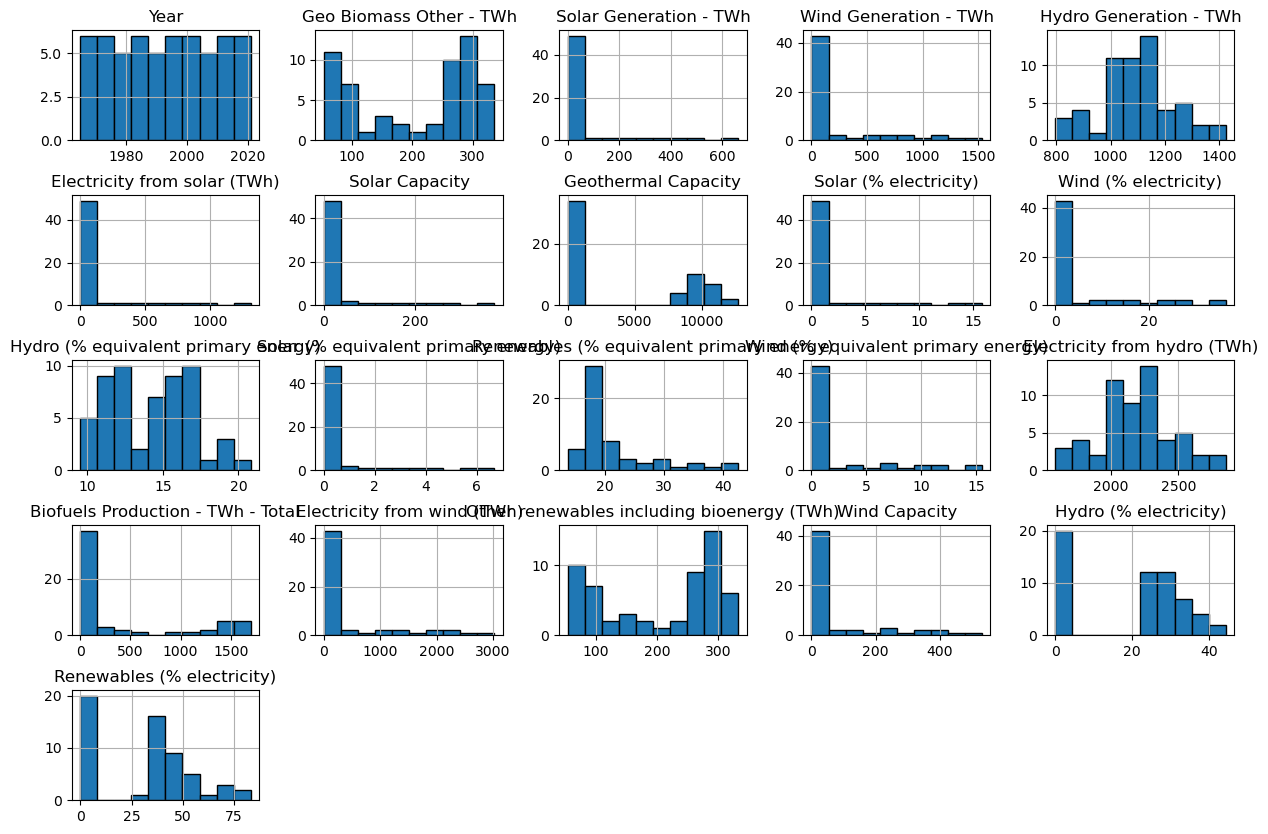

In [20]:
# Ploting histograms of the columns 

usa.hist(figsize=(15, 10), edgecolor='black')
plt.subplots_adjust(hspace=0.5);